### Setting Working Directory and importing libraries

In [1]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedShuffleSplit
from sklearn.metrics import f1_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import os
os.chdir('../')
print(os.getcwd())

/Users/kalyankhatiwada/lecospy


### Reading in the data

In [21]:
raw_grd_indices = pd.read_csv("Data/training/grd_indices.csv")
raw_grd_data = raw_grd_indices.iloc[:, 1:]
raw_grd_data.head()

grd_speclib = pd.read_csv("Data/C_001_SC3_Cleaned_SpectralLib.csv")
grd_speclib.dropna(subset = ["Functional_group1"], inplace=True)
labels = grd_speclib["Functional_group1"]
labels.head()

<class 'pandas.core.series.Series'>
RangeIndex: 1343 entries, 0 to 1342
Series name: Functional_group1
Non-Null Count  Dtype 
--------------  ----- 
1343 non-null   object
dtypes: object(1)
memory usage: 10.6+ KB


/var/folders/6k/89y9bz292sq80h1z4zxk39kh0000gn/T/ipykernel_54982/287070273.py:5: DtypeWarning: Columns (2162,2163,2164,2166,2167,2168,2174,2175,2176,2177,2181,2182,2183) have mixed types. Specify dtype option on import or set low_memory=False.
  grd_speclib = pd.read_csv("Data/C_001_SC3_Cleaned_SpectralLib.csv")


### Scaling, imputing and splitting the data

In [11]:
robust_scaler = RobustScaler()
robust_scaled_grd = robust_scaler.fit_transform(raw_grd_data)

standard_scaler = StandardScaler()
standard_scaled_grd = standard_scaler.fit_transform(raw_grd_data)

minmax_scaler = MinMaxScaler()
minmax_scaled_grd = minmax_scaler.fit_transform(raw_grd_data)

In [66]:
KNNimputer = KNNImputer()
KNNimputed_robust_grd = KNNimputer.fit_transform(robust_scaled_grd)
KNNimputed_standard_grd = KNNimputer.fit_transform(standard_scaled_grd)
KNNimputed_minmax_grd = KNNimputer.fit_transform(minmax_scaled_grd)
KNNimputed_raw_grd = KNNimputer.fit_transform(raw_grd_data)

simple_imputer = SimpleImputer()
simputed_raw_grd = simple_imputer.fit_transform(raw_grd_data)
simputed_robust_grd  = simple_imputer.fit_transform(robust_scaled_grd)
simputed_minmax_grd = simple_imputer.fit_transform(minmax_scaled_grd)
simputed_standard_grd = simple_imputer.fit_transform(standard_scaled_grd)

In [71]:
x_train, x_test, y_train, y_test = train_test_split(KNNimputed_robust_grd, labels, train_size = 0.8)
print(x_train)

[[-1.35315357 -1.46583554  1.08284522 ... -0.39354603 -0.79792306
  -1.19037047]
 [-1.04427346 -1.33473808 -0.23145524 ...  0.3004764  -0.51161441
  -1.02787466]
 [ 0.34667629  0.25590481 -0.23145524 ...  0.65379741  0.64284609
   0.35691201]
 ...
 [ 0.13900688  0.13798895 -0.07839162 ... -0.51674228  0.04943077
   0.01988778]
 [ 0.06116879 -0.04476806 -0.23145524 ...  0.30811884  0.24150383
  -0.14723806]
 [ 0.04706655 -0.03448046 -0.23145524 ...  0.12749482  0.05021272
  -0.19880559]]


### Training and testing model

In [76]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [73]:
predicted = rf.predict(x_test)

0.8401355961790185
0.8568651384142437


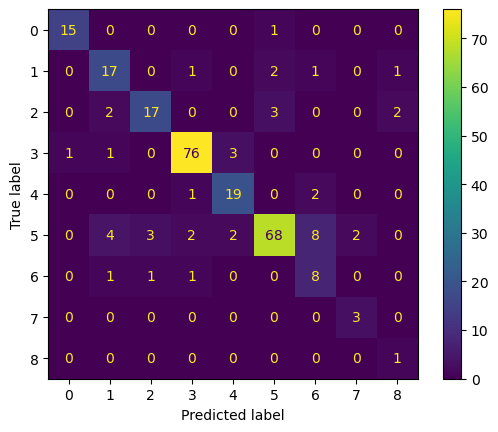

In [74]:
print(f1_score(predicted, y_test, average="weighted"))
print(balanced_accuracy_score(predicted, y_test))
cm = confusion_matrix(predicted, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()